In [106]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
plt.rc('font', family = 'gulim') 

### 데이터 불러오기 및 확인

In [108]:
product = pd.read_excel('./물품_정보_세부_카테고리_분류.xlsx')

In [109]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목       483 non-null    object 
 1   가로(mm)   483 non-null    float64
 2   세로(mm)   483 non-null    float64
 3   높이(mm)   483 non-null    float64
 4   중량(g)    483 non-null    float64
 5   취급주의     483 non-null    int64  
 6   세부_카테고리  483 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.5+ KB


In [110]:
product.describe()

,가로(mm),세로(mm),높이(mm),중량(g),취급주의
count,483.000000,483.00000,483.000000,483.000000,483.000000
mean,211.778534,152.44048,116.943903,855.021110,0.136646
std,130.353917,96.88487,93.431281,1548.324825,0.343829
min,2.200000,2.79400,0.200000,0.200000,0.000000
25%,109.950000,78.05000,47.500000,140.000000,0.000000
50%,190.500000,134.10000,91.000000,330.000000,0.000000
75%,301.003000,206.78100,168.947000,834.550000,0.000000
max,1270.000000,789.94000,490.000000,16782.000000,1.000000


In [111]:
# 카테고리별 갯수 확인
category_groups = product.groupby('세부_카테고리').size()
print(category_groups)

세부_카테고리
가공식품          34
건강기능식품         5
그 밖의 화장품류     41
세정용 화장품류      15
세제류           11
음료             5
의류             7
의약외품류         20
잡화류          251
전자제품류         84
제과류           10
dtype: int64


In [112]:
# 가로길이별 갯수 확인
width_groups = product.groupby('가로(mm)').size().sort_values(ascending=False).head(30)
print(width_groups)

가로(mm)
127.0    13
300.0     7
160.0     6
165.1     4
216.0     4
190.0     4
254.0     4
320.0     4
175.0     4
381.0     4
406.4     4
101.6     3
140.0     3
190.5     3
50.0      3
387.1     3
170.0     3
152.4     3
97.0      3
182.0     3
345.0     3
361.0     3
304.8     3
203.0     3
203.2     3
350.0     3
80.0      3
355.6     2
167.0     2
266.7     2
dtype: int64


#### Boxplot으로 이상치 확인

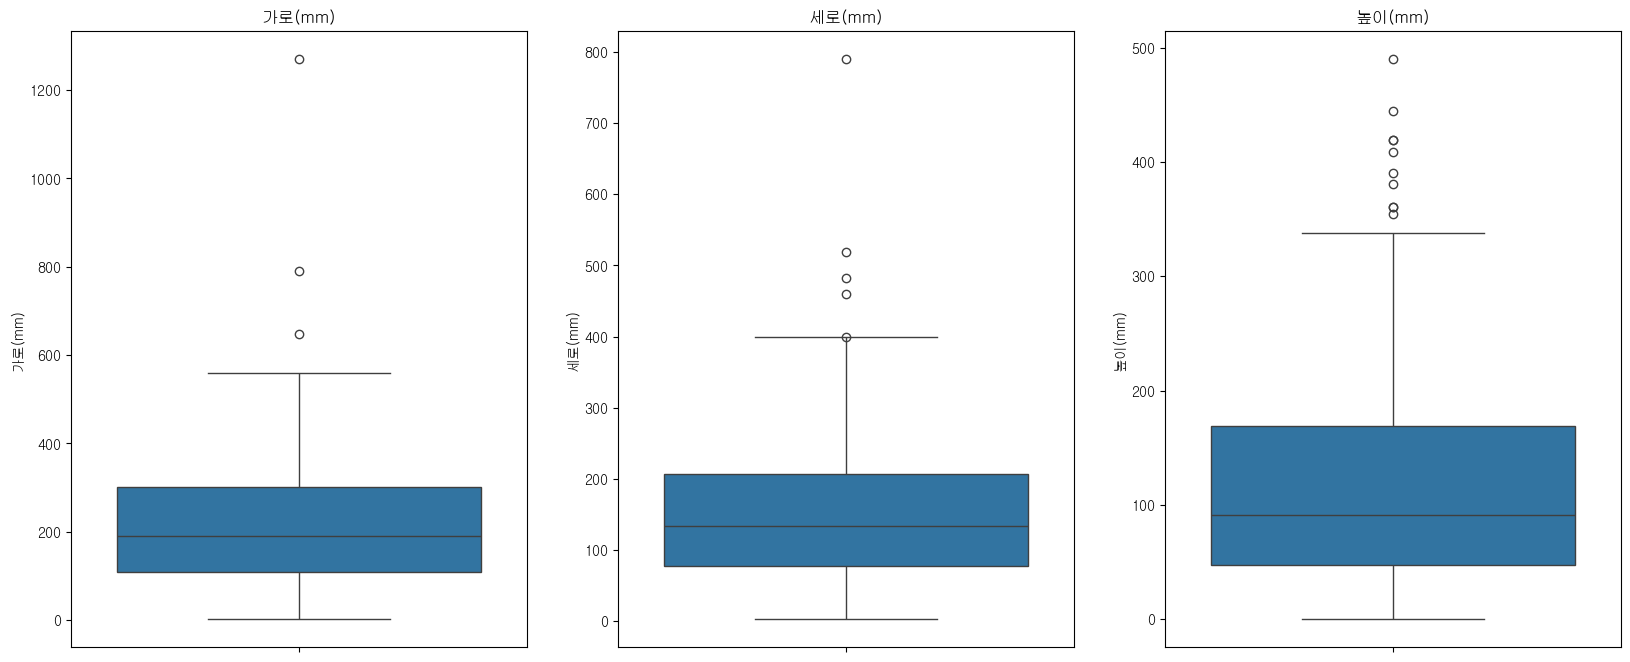

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(data=product['가로(mm)'], ax=ax1)
ax1.set_title('가로(mm)')

sns.boxplot(data=product['세로(mm)'], ax=ax2)
ax2.set_title('세로(mm)')

sns.boxplot(data=product['높이(mm)'], ax=ax3)
ax3.set_title('높이(mm)')

# sns.boxplot(data=product['중량(g)'], ax=ax4)
# ax4.set_title('중량(g)')

plt.show()

#### 히스토그램과 정규분포 확인

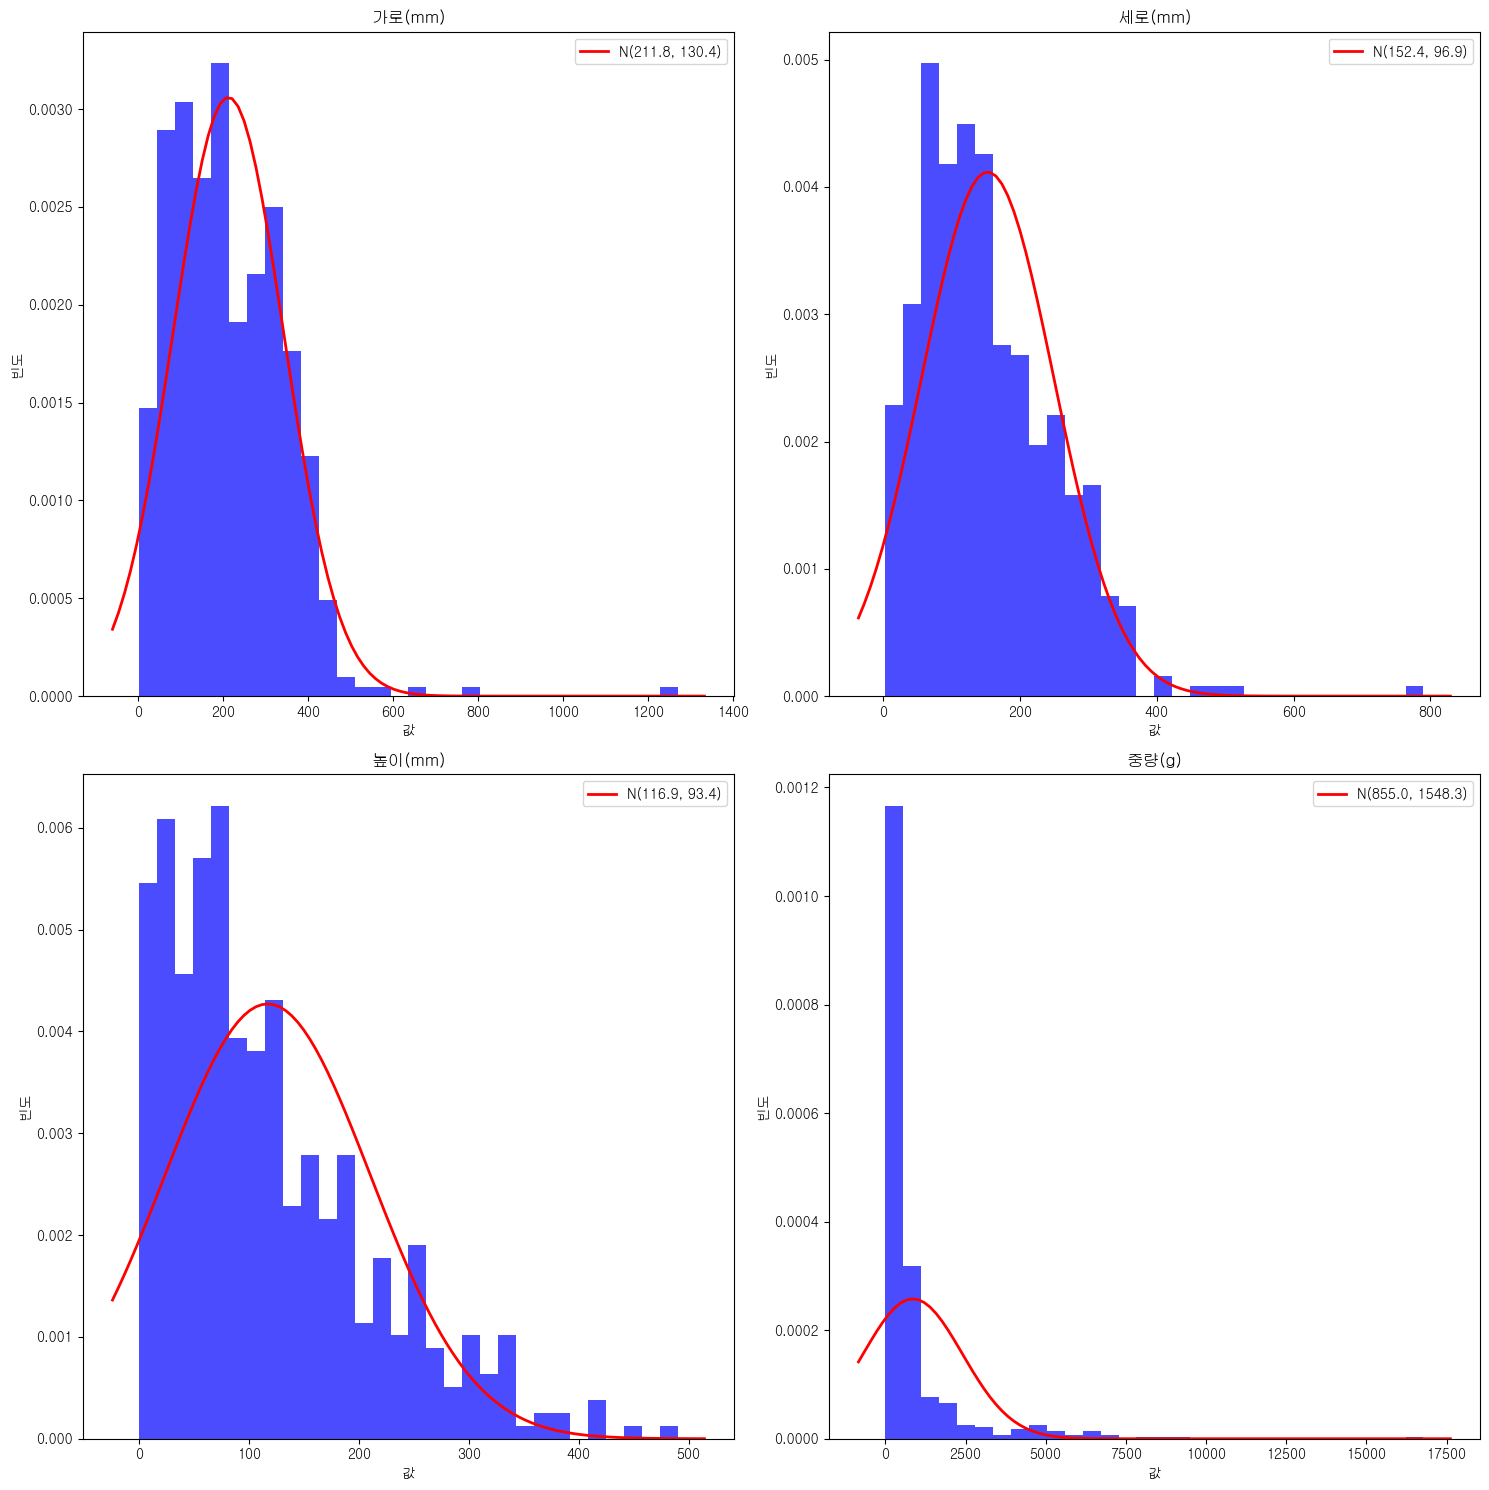

In [114]:
from scipy import stats

plt.figure(figsize=(15, 15))

# 4개의 subplot 생성
features = ['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    # 데이터
    data = product[feature]
    
    # 히스토그램 그리기 (density=True로 설정하여 확률 밀도로 변환)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
    
    # 정규분포 곡선을 위한 x 범위 생성
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # 정규분포 매개변수 계산
    mu = data.mean()
    sigma = data.std()
    
    # 정규분포 곡선 그리기
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r-', lw=2, label=f'N({mu:.1f}, {sigma:.1f})')
    
    plt.title(feature)
    plt.xlabel('값')
    plt.ylabel('빈도')
    plt.legend()

plt.tight_layout()
plt.show()

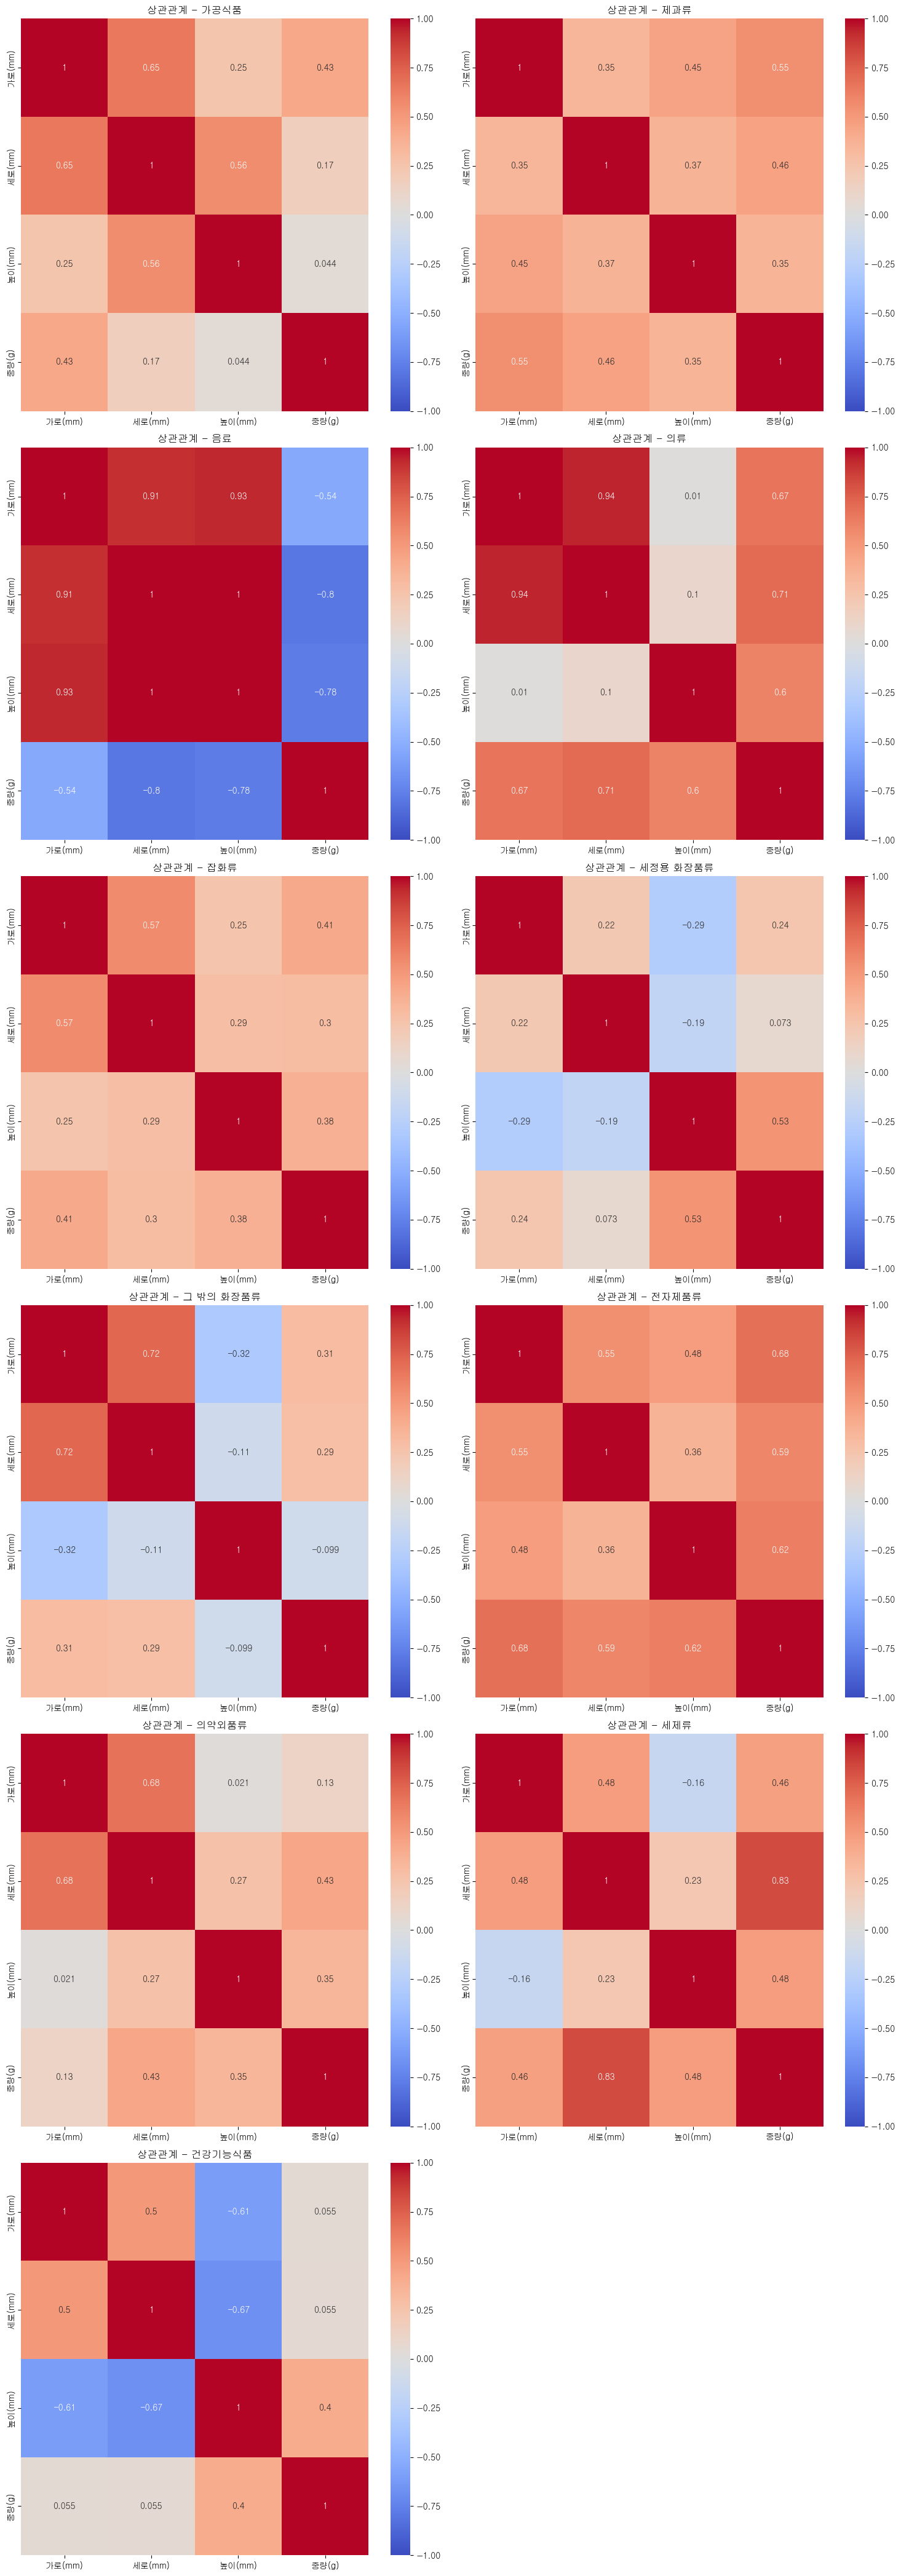

In [115]:
# subplot으로 한 번에 비교
categories = product['세부_카테고리'].unique()
n_categories = len(categories)

# 적절한 subplot 크기 계산
n_cols = 2
n_rows = (n_categories + 1) // 2

plt.figure(figsize=(15, 7*n_rows))

for idx, category in enumerate(categories, 1):
    category_data = product[product['세부_카테고리'] == category]
    correlation = category_data[features].corr()
    
    plt.subplot(n_rows, n_cols, idx)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'상관관계 - {category}')

plt.tight_layout()
plt.show()

#### 최대 박스 규격에서 벗어나는 물품 체크

In [116]:
print((product['가로(mm)'] >= 480).value_counts())
print((product['세로(mm)'] >= 480).value_counts())
print((product['높이(mm)'] >= 480).value_counts())
print(((product['가로(mm)'] >= 480) | (product['세로(mm)'] >= 480) | (product['높이(mm)'] >= 480)).value_counts())

가로(mm)
False    477
True       6
Name: count, dtype: int64
세로(mm)
False    480
True       3
Name: count, dtype: int64
높이(mm)
False    482
True       1
Name: count, dtype: int64
False    474
True       9
Name: count, dtype: int64


In [117]:
stuff = product[product['세부_카테고리'] == '잡화류']
print(stuff.head())

                      항목  가로(mm)  세로(mm)  높이(mm)  중량(g)  취급주의 세부_카테고리
48  Steve Madden 남자 로퍼구두   376.9   229.1   132.1  453.6     0     잡화류
49     Calvin Klein 여자구두   288.0   179.1   103.9  581.0     0     잡화류
50  Alpine Swiss 남성용 목도리   101.6    76.2    12.7  113.4     0     잡화류
51     Myneiyi 패션 실크 스카프    25.0    20.0     1.5  100.0     0     잡화류
52  PrettyGarden 여성용 스웨터   283.0   242.0    54.0  554.0     0     잡화류


In [118]:
print(((stuff['가로(mm)'] >= 480) | (stuff['세로(mm)'] >= 480) | (stuff['높이(mm)'] >= 480)).value_counts())

False    244
True       7
Name: count, dtype: int64


In [119]:
oversize = product[
    (product['가로(mm)'] >= 480) |
    (product['세로(mm)'] >= 480) |
    (product['높이(mm)'] >= 480) |
    (product['중량(g)'] >= 30000)
]

oversize

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
146,SKYSPER 하이킹 백팩,170.000,259.000,490.000,500.0,0,잡화류
305,차량용 햇빛가리개,477.520,518.160,127.000,580.5,0,잡화류
312,주차 스토퍼,543.560,200.660,198.120,6699.5,0,잡화류
404,바이올린,789.940,260.096,109.982,2095.5,1,잡화류
405,우쿨렐레,558.800,198.120,76.200,816.4,0,잡화류
407,색소폰,647.700,254.000,152.400,4141.2,0,잡화류
409,첼로,1270.000,482.600,330.200,8010.4,0,잡화류
479,전자드럼,500.126,459.994,130.048,6314.0,0,전자제품류
480,전자키보드,240.030,789.940,70.104,2753.3,0,전자제품류


###### 박스 규격에 벗어나는 물품들을 보면 대체로 악기인 것을 알 수 있다.

In [120]:
small_product = product[(product['가로(mm)'] + product['세로(mm)'] + product['높이(mm)']) <= 500]
print(small_product.groupby('세부_카테고리').size())
print(small_product.count())

세부_카테고리
가공식품          20
그 밖의 화장품류     38
세정용 화장품류      15
세제류            7
음료             4
의류             3
의약외품류          8
잡화류          135
전자제품류         48
제과류            7
dtype: int64
항목         285
가로(mm)     285
세로(mm)     285
높이(mm)     285
중량(g)      285
취급주의       285
세부_카테고리    285
dtype: int64


In [121]:
small_product.head()

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
2,하리보 젤리,25.4,25.4,25.4,2.0,0,제과류
5,Sarah's Candy Factory 마시멜로,162.0,158.0,67.0,73.7,0,제과류
6,Life Savers 민트캔디,175.0,166.9,69.1,368.5,0,제과류
7,Ice Breakers Ice Cubes 페퍼민트 츄잉껌,51.3,145.5,186.7,555.1,0,가공식품
8,ChocZero 무설탕 캐러멜,152.9,109.0,23.1,99.2,0,제과류


In [122]:
small_product_caution = small_product[small_product['취급주의'] == 1]

In [97]:
small_product_caution.groupby('세부_카테고리').size()

세부_카테고리
가공식품          2
그 밖의 화장품류     9
잡화류          11
전자제품류        20
dtype: int64

### 전처리 및 알고리즘 구현

##### 물품은 취급주의인지 아닌지에 따라서 패키징이 달라진다.

In [128]:
# 취급주의 물품 확인
caution_product = product[product['취급주의'] == 1]
caution_product.count()

항목         66
가로(mm)     66
세로(mm)     66
높이(mm)     66
중량(g)      66
취급주의       66
세부_카테고리    66
dtype: int64

In [125]:
# 비취급주의 물품만 선별
product_filtered = product.drop(caution_product.index)

In [126]:
product_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 482
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목       417 non-null    object 
 1   가로(mm)   417 non-null    float64
 2   세로(mm)   417 non-null    float64
 3   높이(mm)   417 non-null    float64
 4   중량(g)    417 non-null    float64
 5   취급주의     417 non-null    int64  
 6   세부_카테고리  417 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.1+ KB


##### 물품은 취급주의인지 아닌지에 따라서 패키징이 달라진다.

###### 박스 크기 규격(1호 ~ 6호)

In [129]:
box_size = pd.DataFrame({'box_num' : [1, 2, 3, 4, 5, 6],
                         'width' : [220, 270, 350, 340, 410, 480],
                         'depth' : [190, 180, 250, 250, 310, 380],
                         'height' : [90, 150, 100, 210, 280, 340]
                         })

In [130]:
box_size

,box_num,width,depth,height
0,1,220,190,90
1,2,270,180,150
2,3,350,250,100
3,4,340,250,210
4,5,410,310,280
5,6,480,380,340


In [131]:
from itertools import permutations

def box_standardize(product_df, box_size):
    """
    product_df : 물품 정보 (가로(mm), 세로(mm), 높이(mm) 등의 컬럼 보유)
    box_size     : 박스 정보 (box_num, width, depth, height 컬럼 보유)
    
    반환값 : product_df에 '패키징' 컬럼을 추가하여, 
             각 제품이 들어갈 수 있는 박스 번호를 append
             (만약 모든 박스에 들어가지 않으면 패키징 제외)
    """
    # 결과를 저장하기 위해 데이터프레임 복사
    product_df = product_df.copy()

    # '적합박스'라는 컬럼을 먼저 만들고 초기값 None
    product_df['패키징'] = None

    # 모든 행(제품)에 대해 반복
    for idx, row in product_df.iterrows():
        # 현재 물품의 가로/세로/높이를 리스트로 추출
        dims = [row['가로(mm)'], row['세로(mm)'], row['높이(mm)']]

        # 박스를 찾았는지 여부
        found_box = None
        
        # box_df를 작은 박스부터 확인
        for _, box_row in box_size.iterrows():
            box_w, box_d, box_h = box_row['width'], box_row['depth'], box_row['height']

            # (가로, 세로, 높이)의 모든 회전(순열)을 확인
            for perm in permutations(dims):
                if perm[0] <= box_w and perm[1] <= box_d and perm[2] <= box_h:
                    # 들어갈 수 있는 박스를 찾으면 중단
                    found_box = box_row['box_num']
                    break
            if found_box is not None:
                break
    
        if found_box is None:
            found_box = '패키징 제외'
            
        # 결과 저장
        product_df.at[idx, '패키징'] = found_box

    return product_df

In [132]:
box_standardize(product_filtered, box_size)

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리,패키징
0,콘푸러스트 시리얼,307.300,251.500,381.000,36.3,0,가공식품,5
1,SKIPPY 땅콩 잼,225.800,225.800,354.800,751.3,0,가공식품,5
2,하리보 젤리,25.400,25.400,25.400,2.0,0,제과류,1
3,POPS 막대 사탕,313.900,249.900,79.000,979.8,0,제과류,3
4,페로로쉐 초콜릿,310.100,40.100,272.500,524.5,0,제과류,5
...,...,...,...,...,...,...,...,...
474,샤오미 보조배터리,148.400,73.000,15.000,225.0,0,전자제품류,1
479,전자드럼,500.126,459.994,130.048,6314.0,0,전자제품류,None
480,전자키보드,240.030,789.940,70.104,2753.3,0,전자제품류,None
481,플레이스테이션 게임 조명,69.800,304.800,101.600,99.2,0,전자제품류,3
